In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Step 1: Load and Inspect the Dataset
metadata = pd.read_csv(r"steam.csv")  # Replace with your file path

# Step 2: Data Preprocessing
# Fill missing values in text columns with empty strings
metadata['description'] = metadata['description'].fillna('')
metadata['tags'] = metadata['tags'].fillna('')
metadata['developer'] = metadata['developer'].fillna('')

# Combine relevant textual features into one column
metadata['combined_features'] = (
    metadata['description'] + ' ' +
    metadata['tags']
)

In [7]:
# Step 3: Feature Engineering
# Create TF-IDF matrix for combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(metadata['combined_features'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [8]:
# Step 4: Build the Recommendation Function
# Create an index mapping for game names
indices = pd.Series(metadata.index, index=metadata['name']).drop_duplicates()

def recommend_games(game_name, cosine_sim=cosine_sim):
    """
    Recommend games similar to the input game based on cosine similarity.
    :param game_name: Name of the input game
    :param cosine_sim: Cosine similarity matrix
    :return: List of recommended game names
    """
    # Get the index of the game that matches the title
    idx = indices[game_name]

    # Get the pairwise similarity scores for this game with all other games
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games by similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar games (excluding the input game itself)
    sim_scores = sim_scores[1:11]  # Top 10 excluding the first result (self)
    game_indices = [i[0] for i in sim_scores]

    # Return the names of the top 10 similar games
    return metadata['name'].iloc[game_indices]

# Step 5: Test the Recommender System
game_name = "Dota 2"  # Replace with a game name from your dataset
recommendations = recommend_games(game_name)
print(f"Games similar to '{game_name}':\n", recommendations)

Games similar to 'Dota 2':
 7085                                         Roads of Rome
967                                                  HOARD
14479                                           VectorWave
13108                         Greyhound Manager 2 Rebooted
1981                                         Anomaly Korea
14615    Phantasmat: The Endless Night Collector's Edition
24299                                   The Legend Of Vraz
25104                   The Qaedon Wars - The Story Begins
3919                                          Pyrite Heart
2346                                            Last Dream
Name: name, dtype: object


In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 12.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.0 MB 3.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.0 MB 4.1 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 4.1 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.0 MB 3.8 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 3.5 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.0 MB 3.4 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 3.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 3.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 2.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 2.8 MB/s eta 0:00:01
   -------------

In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


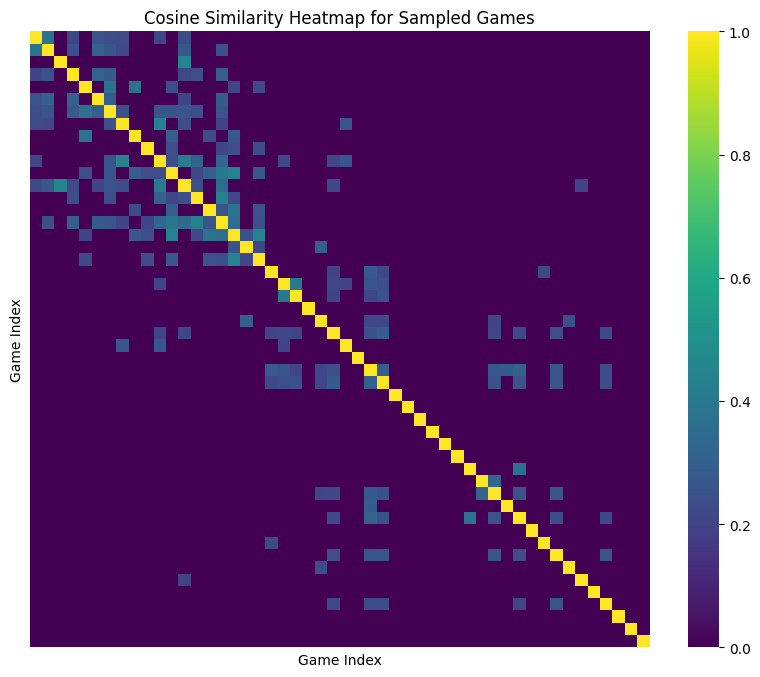

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select a subset of the similarity matrix for visualization
sample_size = 50  # Adjust as needed
cosine_sim_subset = cosine_sim[:sample_size, :sample_size]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_subset, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap for Sampled Games")
plt.xlabel("Game Index")
plt.ylabel("Game Index")
plt.show()